<a href="https://colab.research.google.com/github/besherh/Machine-Learning-Course/blob/master/Clustering/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#load the dataset
#download the dataset from our Github page
#https://github.com/besherh/Machine-Learning-Course/blob/master/1-Introduction/data_sets/iris.csv

iris = pd.read_csv("https://raw.githubusercontent.com/besherh/Machine-Learning-Course/master/1-Introduction/data_sets/Iris.csv")

In [3]:
iris.shape

(150, 6)

In [4]:
#building the input for the model ( 4 attributes :SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm )
x = iris.iloc[:, [1, 2, 3, 4]].values


Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimal number of clusters. Although we already know the answer is 3 it is still interesting to run ( we have three sepcies in the dataset: setosa,versicolor and virginica)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

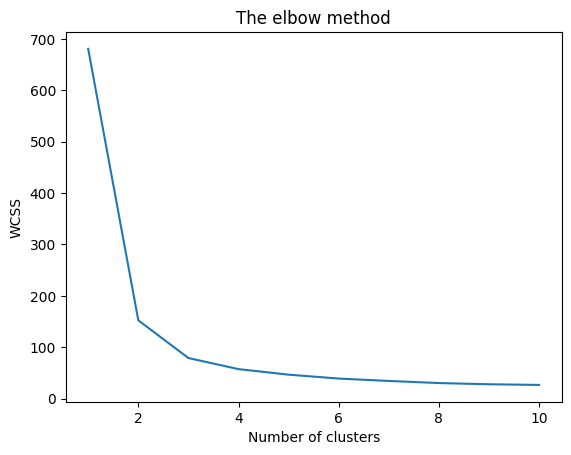

In [5]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    # refer to
    #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    # to check the params of KMeans and the meaning for each one
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.



In [6]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
#generated cluster
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


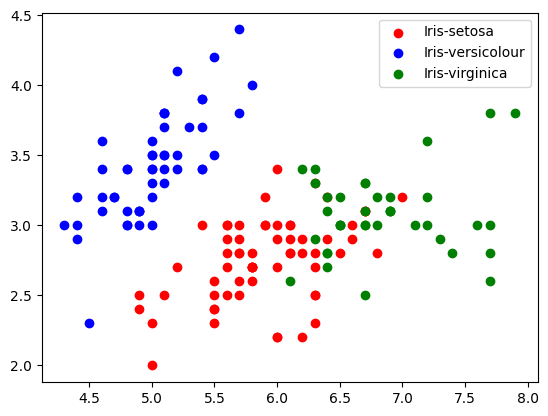

In [8]:
print(kmeans.cluster_centers_) #display cluster centers
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

# Assuming 'X' is your data and 'kmeans.labels_' are your cluster labels from K-means
silhouette_avg = silhouette_score(x, kmeans.labels_)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.5525919445499757
